In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import copy

In [2]:
df_train = pd.read_csv("cl_75_v1.csv")
df_test = pd.read_csv("cl_25_v1.csv")

In [34]:
df_test

,Sex,Age,FWeight,Education-num,Capital-gain,Capital-loss,Hour/week,Federal-gov,Local-gov,Private,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Salary
0,1,0.205479,0.130019,0.733333,0.000000,0.000000,0.500000,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0.356164,0.189271,0.866667,0.000000,0.000000,0.448980,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0.356164,0.070206,0.400000,0.000000,0.468779,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0.534247,0.138063,0.800000,0.000000,0.000000,0.397959,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0.027397,0.105052,0.533333,0.000000,0.000000,0.397959,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7535,0,0.164384,0.076283,0.533333,0.000000,0.000000,0.346939,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7536,0,0.383562,0.071675,0.733333,0.000000,0.000000,0.479592,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7537,0,0.191781,0.126373,0.866667,0.000000,0.000000,0.295918,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7538,0,0.356164,0.164566,0.600000,0.000000,0.000000,0.397959,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
# to get rid of undesireable columns
del df_train["Unnamed: 0"]
del df_test["Unnamed: 0"]

In [43]:
columns = list(df_train.columns.values)
columns.pop(columns.index("Salary"))

In [38]:
Y_df_train = df_train["Salary"]
Y_df_test = df_test["Salary"]
X_df_train = df_train[columns]
X_df_test = df_test[columns]

In [115]:
print(X_df_train.shape)
print(Y_df_train.shape)
print(X_df_test.shape)
print(Y_df_test.shape)

(22622, 103)
(22622, 1)
(7540, 103)
(7540, 1)


In [121]:
def act_fun(z):
    return 1/(1+np.exp(-z))

In [122]:
def initWeightandBias(nx):
    w = np.zeros([nx,1])
    b = 0.0
    initWb = {"weight" : w,
            "bias" : b}
    return w,b

In [123]:
def forwardPropagation(w,b, X,Y):
    m = X.shape[1] # columns
    Y_hat = act_fun(np.dot(w.T,X.T) + b)
    cost = -np.sum(np.dot(Y,np.log(Y_hat).T) + np.dot((1-Y),np.log(1-Y_hat).T)) / m
    dw = 1/m*np.dot(X.T,(Y_hat - Y).T)
    db = 1/m*np.sum(Y_hat - Y)
    cost = np.squeeze(np.array(cost))
    fPDerivatives = {"dw": dw,
             "db": db}    
    return fPDerivatives, cost

In [124]:
def optimizationOfParameters(w,b, X, Y, iteration=100, learning_rate=0.001):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs = []
    for i in range(iteration):
        fPDerivatives, cost = forwardPropagation(w,b, X,Y)
        dw = fPDerivatives["dw"]
        db = fPDerivatives["db"]
        costs.append(cost)
        w = w - learning_rate*dw
        b = b - learning_rate*db
    parameters = {"weight": w, "bias": b}
    gradients = {"gradientWeight": w, "gradientBias": b}
    return costs, parameters, gradients

In [162]:
def predict(w,b,X):
    m = X.shape[1]
    predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    Y_hat = act_fun(np.dot(w.T,X) + b)
    for i in range(Y_hat.shape[1]):
        if Y_hat[0,i] > 0.5:
            predicted[0,i] = 1
        else:
            predicted[0,i] = 0
    return predicted

In [166]:
def model(Y_train,Y_test,x_train,x_test, learning_rate = 0.05, iteration=100):
    
    Y_train = Y_train.reshape(1,-1)
    Y_test = Y_test.reshape(1,-1)
    
    nx = x_train.shape[1]
    w,b = initWeightandBias(nx)
    
    derivatives, cost = forwardPropagation(w,b,x_train,Y_train)
    costHistory,finalParameters, gradients = optimizationOfParameters(w,b,x_train,Y_train, iteration, learning_rate)
    
    train_predictions = predict(w,b,x_train.T)
    test_predictions = predict(w,b,x_test.T)
    
    train_accuracy = 100 - np.mean(np.abs(train_predictions-Y_train))*100
    test_accuracy = 100 - np.mean(np.abs(test_predictions-Y_test))*100
    
    results = {
        "train_acc": train_accuracy,
        "test_acc": test_accuracy,
        "learning_rate": learning_rate,
        "iteration": iteration,
        "costs" : costHistory,
        "w" : w,
        "b" : b,
        "Train predictions": train_predictions,
        "Test predictions": test_predictions,
    }
    return results

In [167]:
def printTable(results):
    print(f'The result of the model with given iteration number {results["iteration"]} and learning rate {results["learning_rate"]} is:')
    print(f'The accuracy of the model for test is {results["test_acc"]}\t for train is {results["train_acc"]}')
    print(f'The least cost of the model is {np.min(results["costs"])}')
    print("-----------------------------------------------------------------------------------------------------------")

In [172]:
history_v1 = model(Y_df_train,Y_df_test,X_df_train,X_df_test, learning_rate = 0.01, iteration=1000)
history_v2 = model(Y_df_train,Y_df_test,X_df_train,X_df_test, learning_rate = 0.001, iteration=1000)
history_v3 = model(Y_df_train,Y_df_test,X_df_train,X_df_test, learning_rate = 0.005, iteration=2000)
history_v4 = model(Y_df_train,Y_df_test,X_df_train,X_df_test, learning_rate = 0.01, iteration=2000)

In [173]:
printTable(history_v1)
printTable(history_v2)
printTable(history_v3)
printTable(history_v4)

The result of the model with given iteration number 1000 and learning rate0.01 is:
The accuracy of the model for test is 74.9867374005305	 for train is 75.1480859340465
The least cost of the model is 75.0752388616568
-----------------------------------------------------------------------------------------------------------
The result of the model with given iteration number 1000 and learning rate0.001 is:
The accuracy of the model for test is 74.9867374005305	 for train is 75.1480859340465
The least cost of the model is 80.7198342102227
-----------------------------------------------------------------------------------------------------------
The result of the model with given iteration number 2000 and learning rate0.005 is:
The accuracy of the model for test is 74.9867374005305	 for train is 75.1480859340465
The least cost of the model is 75.07489234877329
-----------------------------------------------------------------------------------------------------------
The result of the mode

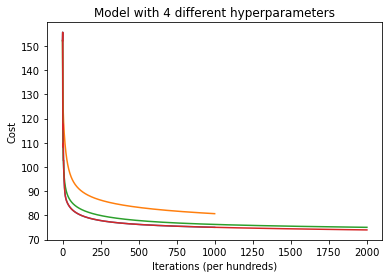

In [174]:
costs3 = np.squeeze(history_v3['costs'])
costs1 = np.squeeze(history_v1['costs'])
costs2 = np.squeeze(history_v2['costs'])
costs4 = np.squeeze(history_v4['costs'])
plt.plot(costs1)
plt.plot(costs2)
plt.plot(costs3)
plt.plot(costs4)
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title("Model with 4 different hyperparameters")
plt.show()